In [28]:
# Logistic Regression
# Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import logsumexp
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import copy
import math

In [30]:
# Loading the data

In [31]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    df = df.dropna()
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

filepath = './framingham.csv'
X, y = load_data(filepath)
print("Shape of X: ",X.shape, "Shape of y: ",y.shape)

Shape of X:  (3658, 15) Shape of y:  (3658,)


In [32]:
#We need to pre-process the data. We are using min-max scaler to scale the input data (X).
#After that, we split the data (X and y) into a training dataset (X_train and y_train) and test dataset (X_test and y_test).

In [33]:
## Data scaling and train-test split

def train_test_split(X, y, test_size=0.25, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_index = int(X.shape[0] * (1 - test_size))

    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

def min_max_scaler(X, feature_range=(0, 1)):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    X_scaled = (X-X_min)/(X_max-X_min)

    return X_scaled


X = min_max_scaler(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Shape of X_train: ",X_train.shape, "Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape, "Shape of y_test: ",y_test.shape)

Shape of X_train:  (2743, 15) Shape of y_train:  (2743,)
Shape of X_test:  (915, 15) Shape of y_test:  (915,)


In [34]:
#Creating the Sigmoid Function

In [35]:
def sigmoid(z):
    g = None
    z = z.astype(float)
    g = 1 / (1 + np.exp(-z))
    return g

In [36]:
#Computing the loss Function

In [37]:
def loss_function(X, y, w, b):
    m, n = X.shape
    total_cost = 0
    y_matrix = y.reshape((m,1))
    z = np.dot(X, w.T) + b
    f_x = sigmoid(z)
    loss = -(np.dot(y_matrix.T, np.log(f_x)) + np.dot((1 - y_matrix).T, np.log(1 - f_x)))
    total_cost_matrix = loss / m
    total_cost = total_cost_matrix.item()
    return total_cost

In [38]:
# Computing the Gradient of the Loss

In [39]:
def compute_gradient_logistic_regression(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    y_matrix = y.reshape((m,1))
    z = np.dot(X, w.T) + b
    f_x = sigmoid(z)
    error = f_x - y_matrix
    dj_db = np.sum(error)
    dj_dw = np.dot(error.T, X)
    dj_db /= m
    dj_dw /= m
    return dj_db, dj_dw

In [40]:
# Training the model using Batch Gradient Descent

In [41]:
def batch_gradient_descent_logistic_regression(X, y, w_in, b_in, alpha, num_iters):
    m = len(X)
    loss_hist = []
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic_regression(X, y, w_in, b_in)
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        loss = loss_function(X, y, w_in, b_in)
        loss_hist.append(loss)
        if i % 100000 == 0:
            print(f"Loss after iteration {i} : {loss}")
    return w_in, b_in, loss_hist

In [42]:
# Initialising Parameters

In [43]:
random_seed = 48
np.random.seed(random_seed)

def initialize_parameters():
    initial_w = None
    initial_b = None
    alpha = None

    initial_w = np.random.randn(1, X_train.shape[1])
    initial_b = np.random.randn()
    alpha = np.random.uniform(0.01, 0.09)

    return initial_w,initial_b,alpha

In [44]:
# Finally Running

In [45]:
initial_w, initial_b, alpha = initialize_parameters()
num_iterations = 500000

w, b, loss_hist = batch_gradient_descent_logistic_regression(X_train ,y_train, initial_w, initial_b, alpha, num_iterations)
print("optimized parameter values w:", w)
print("optimized parameter value b:", b)

Loss after iteration 0 : 0.47639601220542266
Loss after iteration 100000 : 0.3790796536120677
Loss after iteration 200000 : 0.3783148432442181
Loss after iteration 300000 : 0.3781993896734338
Loss after iteration 400000 : 0.378176577107422
optimized parameter values w: [[ 4.81719129e-01  2.66298209e+00 -9.58292695e-02  4.58436468e-02
   1.24325567e+00 -1.73302420e-03  7.32357860e-01  3.49049070e-01
   2.55052510e-02  7.08680283e-01  2.35428078e+00 -5.49306343e-02
   5.14714269e-01 -7.18818709e-01  3.21132575e+00]]
optimized parameter value b: -4.675473555472484


In [46]:
# Predicting and Final Train and Test Accuracy

In [47]:
def predict(X, w, b):
      m, n = X.shape
      p = np.zeros(m)
      z = np.dot(X, w.T) + b
      A = 1 / (1 + np.exp(-z))
      p = np.where(A >= 0.5, 1, 0)
      return p

p_train = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p_train == y_train) * 100))
p_test = predict(X_test, w,b)
print('Test Accuracy: %f'%(np.mean(p_test == y_test) * 100))

Train Accuracy: 83.293091
Test Accuracy: 83.732330


In [48]:
# Calculating precision,sensitivity,specificity and f1-score

In [49]:
precision_train= precision_score(y_train,p_train)
recall_train = recall_score(y_train,p_train)
f1_train = f1_score(y_train,p_train)

precision_test = precision_score(y_test,p_test)
recall_test = recall_score(y_test,p_test)
f1_test = f1_score(y_test,p_test)

tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train,p_train).ravel()
specificity_train = tn_train / (tn_train + fp_train)

tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test,p_test).ravel()
specificity_test = tn_test / (tn_test + fp_test)

print(f'Precision_train: {precision_train}')
print(f'Recall_train (Sensitivity): {recall_train}')
print(f'F1-Score_train: {f1_train}')
print(f'Specificity_train: {specificity_train}')

print(f'Precision_test: {precision_test}')
print(f'Recall_test (Sensitivity): {recall_test}')
print(f'F1-Score_test: {f1_test}')
print(f'Specificity_test: {specificity_test}')

Precision_train: 0.7254901960784313
Recall_train (Sensitivity): 0.08747044917257683
F1-Score_train: 0.15611814345991562
Specificity_train: 0.9939655172413793
Precision_test: 0.7142857142857143
Recall_test (Sensitivity): 0.11194029850746269
F1-Score_test: 0.1935483870967742
Specificity_test: 0.9923175416133163


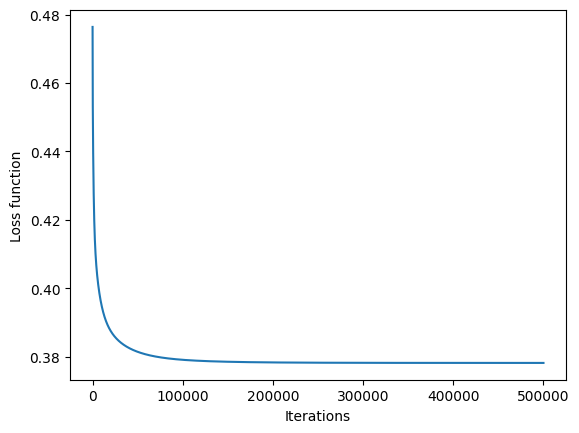

In [50]:
# PLotting the loss values for every training iterations

loss_plot = [loss_hist[i] for i in range(len(loss_hist))]
plt.xlabel("Iterations")
plt.ylabel("Loss function")
plt.plot(loss_plot)
plt.show()